## Task
[Task link]() <br>
[Github link](https://github.com/artyomashigov/DataScience1)

## Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1

### 1.a
How does regularized estimator RIDGE compare with OLS estimator

In [2]:
# set the seed for reproducibility
np.random.seed(20240310)

# generate example data
Y = np.random.normal(loc=0, scale=1, size=100)

# generate epsilon with average 0 and variance sigma^2
epsilon = np.random.normal(loc=0, scale=2, size=100)

# calculate the OLS estimator
beta_0_ols = np.mean(Y)

# set example lambda value
lambda_value = 1

# calculate the Ridge estimator
beta_0_ridge = np.sum(Y) / (len(Y) + lambda_value)

# set different lambda value
lambda_value2 = 10

# calculate the Ridge estimator
beta_0_ridge2 = np.sum(Y) / (len(Y) + lambda_value2)

# Print out the estimators for comparison
print(f"OLS Estimator (beta_0_ols): {beta_0_ols}")
print(f"Ridge Estimator (beta_0_ridge) for lambda={lambda_value}: {beta_0_ridge}")
print(f"Ridge Estimator (beta_0_ridge2) for lambda={lambda_value2}: {beta_0_ridge2}")

# if ridge is closer to 0
print('Ridge is closer to 0' if abs(beta_0_ridge) < abs(beta_0_ols) else 'OLS is closer to 0')

OLS Estimator (beta_0_ols): -0.016904478764947238
Ridge Estimator (beta_0_ridge) for lambda=1: -0.01673710768806657
Ridge Estimator (beta_0_ridge2) for lambda=10: -0.015367707968133852
Ridge is closer to 0


The output demonstrates the impact of regularization (through the  $\lambda$ parameter) on the estimation of $\beta_0$. The OLS estimator, which does not include regularization, is slightly lower (further from 0) compared to both Ridge estimators. As the value of $\lambda$ increases from 1 to 10, the Ridge estimator moves closer to zero, indicating a stronger shrinkage effect.


### 1.b 
Suppose that $\beta_0 = 1$ and $\varepsilon \sim N(0,\sigma^2)$ with $\sigma^2 = 4$. 
Generate a sample of size $n = 20$ from the model and compute the predicted value 
$\hat{Y} = f(\mathbf{x}) = \hat{\beta}^{\text{ridge}}_0$ for a grid of $\lambda$ values 
over the interval $[0, 20]$.

[0.33941989849686094, 0.3360256995118923, 0.3326987123880122, 0.3294369603057768, 0.3262385432154294, 0.3231016341460503, 0.3200244757256117, 0.3170053768980116, 0.3140427098241984, 0.31113490695545587, 0.3082804582677911, 0.30547790864717483, 0.3027258554161192, 0.30002294599276097, 0.297367875674241, 0.29475938553674763, 0.29219626044512376, 0.28967732716542444, 0.28720145257426694, 0.28476754195923076, 0.2823745374049515, 0.2800214162599103, 0.27770718967924984, 0.275430901239256, 0.27319162561942467, 0.27098846734830023, 0.26882055960951384, 0.26668706310467644, 0.26458716496999396, 0.26252007774366587, 0.2604850383813119, 0.2584813073168402, 0.25650816756633, 0.2545649238726457, 0.2526509018886408, 0.2507654473969345, 0.24890792556436467, 0.24707772022933258, 0.24527423322035938, 0.24349688370426978, 0.24174510756251244, 0.24001835679420877, 0.23831609894460448, 0.23663781655767066, 0.23498300665167293, 0.23335118021659187, 0.23174186173233952, 0.23015458870677555, 0.2285889112325

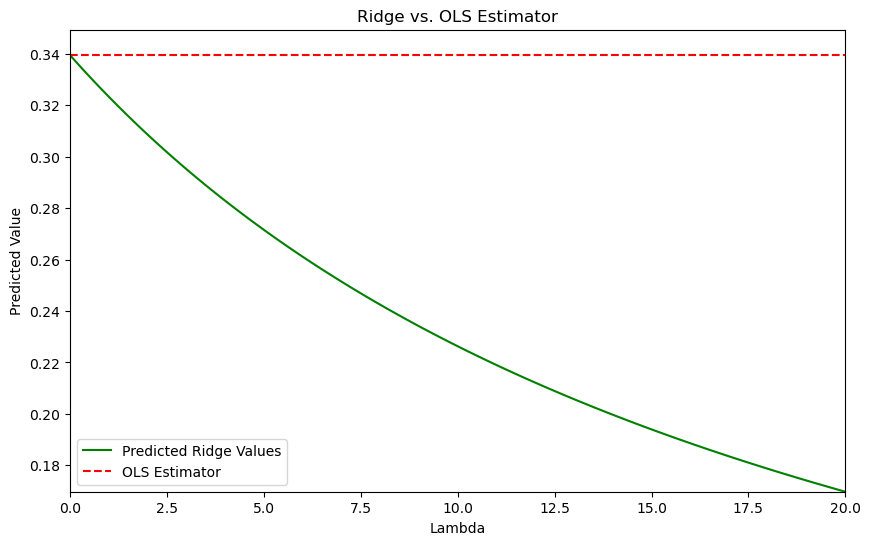

In [3]:
# Parameters
beta_0 = 1
sigma_squared = 4
n = 20

# Create a grid of lambda values
lambda_values = np.linspace(0, 20, 100)

# Set the seed for reproducibility
np.random.seed(20240310)

# Generate epsilon
epsilon = np.random.normal(0, np.sqrt(sigma_squared), n)

# Generate the sample of size n
Y = beta_0 + epsilon

# Calculate the OLS estimator (mean of Y)
beta_0_ols = np.mean(Y)

# Function to compute ridge estimator
def compute_ridge_estimator(Y, lambda_val, n):
    return np.sum(Y) / (n + lambda_val)

# Compute the predicted values for different lambda values
predicted_values = [compute_ridge_estimator(Y, lambda_val, n) for lambda_val in lambda_values]

# print out predicted values
print(predicted_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, predicted_values, label='Predicted Ridge Values', color='g')
plt.axhline(y=beta_0_ols, color='r', linestyle='--', label='OLS Estimator')
plt.xlabel('Lambda')
plt.ylabel('Predicted Value')
plt.title('Ridge vs. OLS Estimator')

# Set the limits for the x and y axes
plt.xlim(0, max(lambda_values))
plt.ylim(min(predicted_values + [beta_0_ols]), beta_0_ols + 0.01)

plt.legend()
plt.show()

The plot shows the relationship between the regularization parameter $ \lambda $ and the Ridge estimator of $ \beta_0 $. As $ \lambda $ increases, the predicted value decreases, reflecting a stronger regularization effect that shrinks the coefficient estimate towards zero; the Ordinary Least Squares (OLS) estimator remains constant as it does not include regularization, emphasizing the difference regularization makes in parameter estimation.

### 1.c
Repeat part b), say, 1000 times so that you end up with 1000 estimates of $ \beta_0 $ for all the $ \lambda $ values that you have picked. For each value of $ \lambda $, compute $ \text{bias}^2[\hat{\beta}^{\text{ridge}}_0] $, $ \text{Var}[\hat{\beta}^{\text{ridge}}_0] $ and $ \text{MSE}[\hat{\beta}^{\text{ridge}}_0] = \text{bias}^2[\hat{\beta}^{\text{ridge}}_0] + \text{Var}[\hat{\beta}^{\text{ridge}}_0] $.

In [4]:
# Parameters
beta_0_true = 1
sigma_squared = 4
n = 20
lambda_values = np.linspace(0, 20, 100)
iterations = 1000

# Set the seed for reproducibility
np.random.seed(20240310)

# List to collect dictionaries
results_list = []

# Simulation loop
for lambda_val in lambda_values:
    # estimates list
    estimates = []
    for _ in range(iterations):
        epsilon = np.random.normal(0, np.sqrt(sigma_squared), n)
        Y = beta_0_true + epsilon
        beta_0_ridge = np.sum(Y) / (n + lambda_val)
        estimates.append(beta_0_ridge)
    estimates = np.array(estimates)
    
    bias_squared = (np.mean(estimates) - beta_0_true) ** 2
    variance = np.var(estimates, ddof=1)
    mse = round(bias_squared + variance,3)
    mse_sklearn = round(mean_squared_error(beta_0_true*np.ones_like(estimates), estimates),3)
    check = (mse - mse_sklearn)<0.01
    # Append the results to the list
    results_list.append({
        'Lambda': lambda_val, 
        'Bias_Squared': bias_squared, 
        'Variance': variance, 
        'MSE': mse, 
        'MSE_sklearn': mse_sklearn,
        'check': check
    })

# Create the DataFrame from the list of dictionaries
results = pd.DataFrame(results_list)
# round the values to 3 decimal places
results = results.round(3)
results

,Lambda,Bias_Squared,Variance,MSE,MSE_sklearn,check
0,0.000,0.000,0.208,0.208,0.208,True
1,0.202,0.000,0.193,0.193,0.193,True
2,0.404,0.000,0.179,0.179,0.179,True
3,0.606,0.003,0.190,0.193,0.193,True
4,0.808,0.001,0.192,0.194,0.193,True
...,...,...,...,...,...,...
95,19.192,0.238,0.054,0.292,0.292,True
96,19.394,0.249,0.049,0.298,0.298,True
97,19.596,0.238,0.055,0.293,0.293,True
98,19.798,0.254,0.046,0.300,0.300,True


We got 100 rows, because we set up 100 unique values of lambda between 0 and 20

In [5]:
# print the smallest MSE row
print(results[results['MSE'] == results['MSE'].min()])

    Lambda  Bias_Squared  Variance    MSE  MSE_sklearn  check
17   3.434         0.012     0.136  0.148        0.148   True


The row with the smallest Mean Squared Error (MSE) corresponds to a regularization parameter $\lambda$ of approximately 3.434. This result suggests that at this level of regularization, the bias introduced is relatively low (squared bias of 0.012), and the variance is moderate (0.136), leading to an optimal trade-off between bias and variance as evidenced by the minimum MSE of 0.148. The agreement between our calculated MSE and the MSE from sklearn's function, both yielding 0.148, confirms the correctness of our calculations and the reliability of the estimator at this particular $\lambda$

### 1.d
Plot $\text{bias}^2[\hat{\beta}^{\text{ridge}}_0]$, $\text{Var}[\hat{\beta}^{\text{ridge}}_0]$ 
and $\text{MSE}[\hat{\beta}^{\text{ridge}}_0]$ as a function of $\lambda$ and interpret 
the results. Can a ridge regression give a better prediction than OLS?

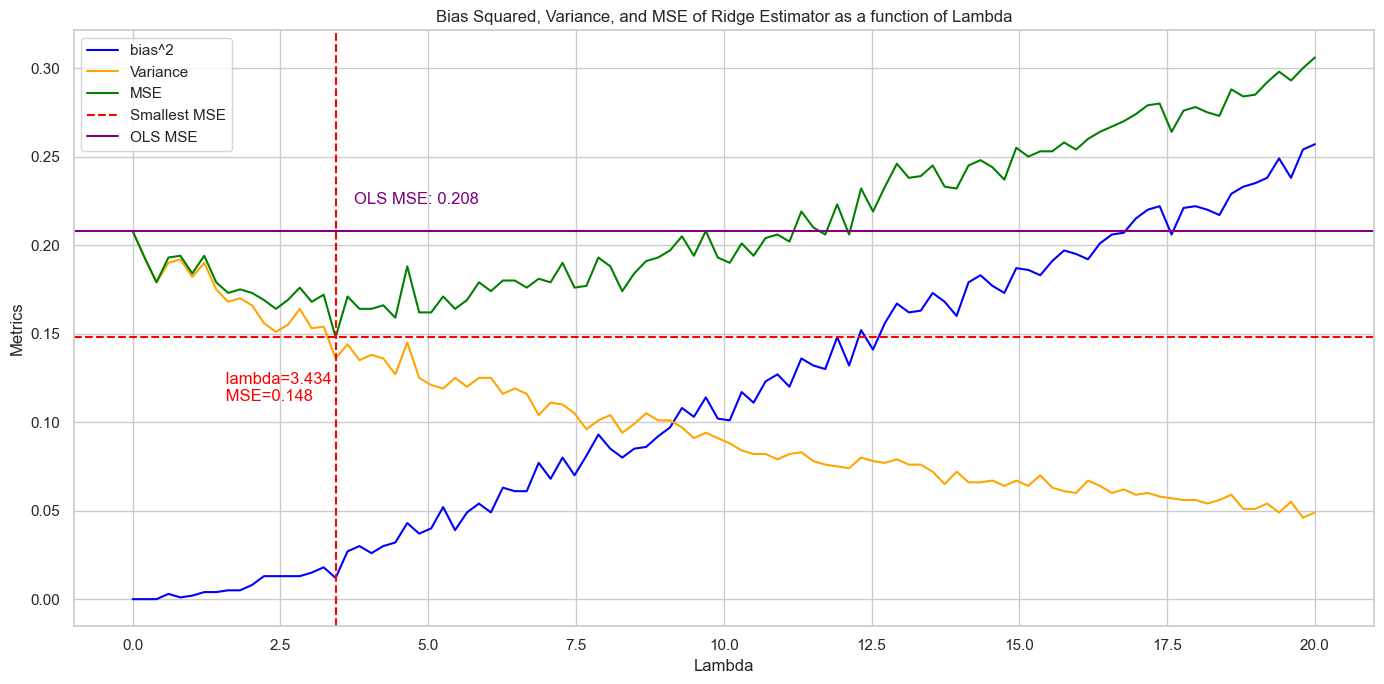

In [6]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot bias^2, variance, and MSE
plt.figure(figsize=(14, 7))

# Bias squared
sns.lineplot(x='Lambda', y='Bias_Squared', data=results, label='bias^2', color='blue')

# Variance
sns.lineplot(x='Lambda', y='Variance', data=results, label='Variance', color='orange')

# MSE
sns.lineplot(x='Lambda', y='MSE', data=results, label='MSE', color='green')

# add a horizontal line for the smallest MSE
min_mse = results['MSE'].min()
plt.axhline(y=min_mse, color='red', linestyle='--', label='Smallest MSE')

# add a vertical line with the smallest MSE
min_lambda = results[results['MSE'] == min_mse]['Lambda'].values[0]
plt.axvline(x=min_lambda, color='red', linestyle='--')

# annotate the smallest MSE and lambda
plt.text(x=1.5, y=0.11, s=f' lambda={min_lambda:.3f}\n MSE={min_mse:.3f}', color='red', va='bottom')


# add a horizontal line for the OLS MSE
ols_mse = results['MSE'][0]
plt.axhline(y=ols_mse, color='purple', linestyle='-', label='OLS MSE')

# annotate the OLS MSE
plt.text(x=3.75, y=0.23, s=f'OLS MSE: {ols_mse}', color='purple', va='top')


# Add labels and title
plt.xlabel('Lambda')
plt.ylabel('Metrics')
plt.title('Bias Squared, Variance, and MSE of Ridge Estimator as a function of Lambda')
plt.legend()

# Adjust layout to prevent overlap of annotations
plt.tight_layout()

# Show plot with annotations
plt.show()

The plot illustrates the relationship between the regularization parameter $ \lambda $ and the bias squared, variance, and mean squared error (MSE) of the ridge regression estimator for $ \beta_0 $. As $ \lambda $ increases, the bias squared increases, which suggests that the estimator is getting systematically further away from the true parameter value. In contrast, the variance decreases, indicating that the estimator’s predictions are becoming more consistent. However, the MSE initially decreases, reaching a minimum (MSE = 0.148) before starting to increase again as $ \lambda $ continues to grow, which represents the trade-off between bias and variance. In this specific scenario, there is a value of $ \lambda $ for which the ridge regression outperforms OLS in terms of MSE, showing that ridge regression can indeed provide a better prediction than OLS by optimally balancing bias and variance and choosing $ \lambda $ parameter (3.434). Notice that MSE for OLS (0.208) corresponds to $ \lambda $ = 0


## Part 2

### 2.a
(a) As we increase $s$ (constraint) from 0, the training RSS will:
1. Increase initially, and then eventually start decreasing in an inverted U shape.
2. Decrease initially, and then eventually start increasing in a U shape.
3. Steadily increase.
4. Steadily decrease.
5. Remain constant.

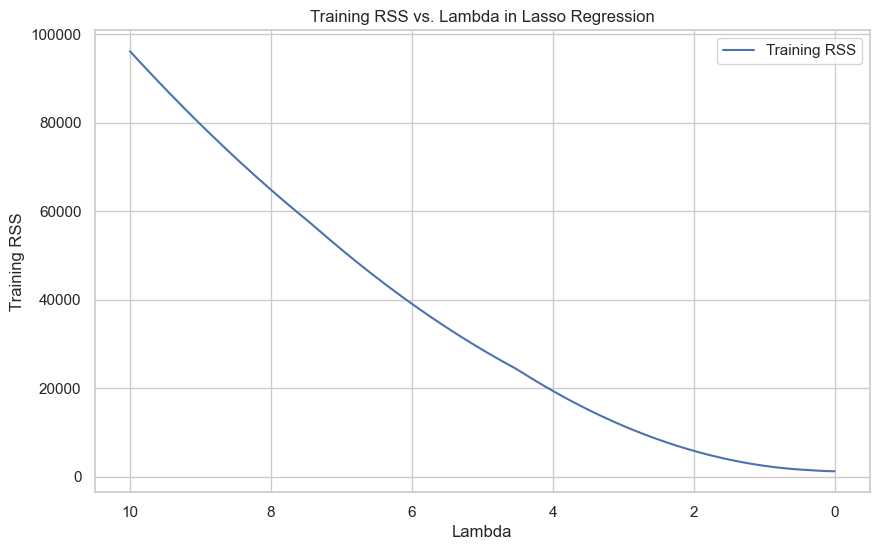

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=4.0, random_state=42)

# Values of lambda (alpha in sklearn) to test, using linspace for a linear distribution
lambdas = np.linspace(0.001, 10, 200)  # Linear range of values of lambda (alpha)
rss = []  # To store the RSS values

# Fit Lasso model for each lambda (alpha) and calculate RSS
for lambda_ in lambdas:
    lasso = Lasso(alpha=lambda_, max_iter=10000)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    rss.append(mean_squared_error(y, y_pred) * len(y))  # RSS = MSE * N

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambdas, rss, label='Training RSS')
plt.xlabel('Lambda')
plt.ylabel('Training RSS')
plt.gca().invert_xaxis()
plt.title('Training RSS vs. Lambda in Lasso Regression')
plt.legend()
plt.show()


**Answer: 4 Steadily decrease** 

As we increase *s* from 0, the training RSS will steadily decrease, as shown in the graph depicting training RSS versus Lambda $ \lambda $ in Lasso Regression. The graph visually confirms that lowering $\lambda$ enables the Lasso model to better capture the data's variability, resulting in a lower RSS. The inverse relationship between *s*  and $\lambda$ stems from the fact that *s*  represents the constraint for the sum of the absolute values of the coefficients, and as $\lambda$ increases, this constraint decreases, leading to stronger regularization and a simpler model.


### 2.b

(b) As we increase $s$ (constraint) from 0, the test RSS will:
1. Increase initially, and then eventually start decreasing in an inverted U shape.
2. Decrease initially, and then eventually start increasing in a U shape.
3. Steadily increase.
4. Steadily decrease.
5. Remain constant.

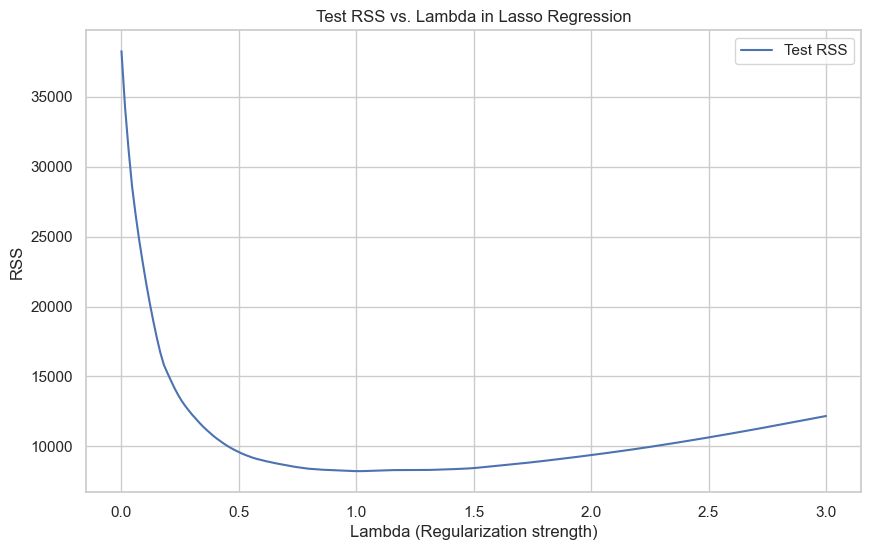

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with more features and samples to increase the chance of overfitting
X, y = make_regression(n_samples=200, n_features=100, noise=10.0, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Values of lambda to test, using linspace for a linear distribution
lambdas = np.linspace(0.001, 3, 200)  # Linear range of values of lambda

# Initialize lists to store the results
training_mse = []  # To store the training MSE values
test_rss = []  # To store the test RSS values

# Fit Lasso model for each lambda and calculate MSE/RSS
for lambda_ in lambdas:
    model = Lasso(alpha=lambda_, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate and store training MSE
    y_train_pred = model.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # Calculate and store test RSS
    y_test_pred = model.predict(X_test)
    test_rss.append(mean_squared_error(y_test, y_test_pred) * len(y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambdas, test_rss, label='Test RSS')
plt.xlabel('Lambda (Regularization strength)')
plt.ylabel('RSS')
plt.title('Test RSS vs. Lambda in Lasso Regression')
plt.legend()
plt.show()


**Answer: 2. Decrease initially, and then eventually start increasing in a U shape.**

The graph depicting the Test RSS versus Lambda in Lasso Regression illustrates a sharp decrease in Test RSS as $\lambda$ decreases, followed by a gradual increase after reaching a minimum point. This behavior aligns with option ii: "Decrease initially, and then eventually start increasing in a U shape." As we increase *s* from 0 (decreasing $\lambda$), the test RSS drops, indicating improved model fit to the unseen data due to reduced regularization. However, as $\lambda$ becomes very low (equivalently, *s* becomes very high), the model begins to overfit the training data, leading to a rise in test RSS.

### 2.c

(c) As we increase $s$ (constraint) from 0, the variance will:
1. Increase initially, and then eventually start decreasing in an inverted U shape.
2. Decrease initially, and then eventually start increasing in a U shape.
3. Steadily increase.
4. Steadily decrease.
5. Remain constant.

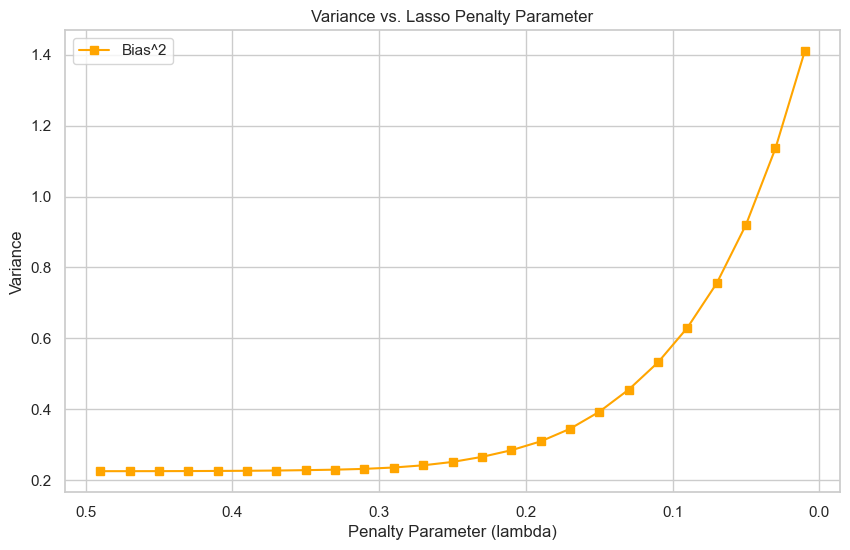

In [9]:
# Define the true function to model
def true_function(X):
    return X[:, 0] + X[:, 1]

# Simulation parameters
n_samples = 20
n_repeats = 1000
x_to_predict = np.array([[0, 0]])  # Test point to evaluate
lambdas = np.arange(0.01, 0.5, 0.02)  # Range of Lasso penalty parameters

# Initialize arrays to store results
predictions = np.empty((n_repeats, len(lambdas)))

# Monte Carlo simulation to estimate bias, variance, and MSE for each lambda
for i in range(n_repeats):
    # Generate random data
    X = np.random.uniform(0, 1, (n_samples, 2))
    epsilon = np.random.normal(0, 2, n_samples)
    Y = true_function(X) + epsilon

    # Fit Lasso model and make predictions for each lambda
    for idx, lambda_ in enumerate(lambdas):
        lasso = Lasso(alpha=lambda_).fit(X, Y)
        predictions[i, idx] = lasso.predict(x_to_predict)

# Calculate variance
variance = np.var(predictions, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambdas, variance, label='Bias^2', marker = 's', color='orange')
plt.xlabel('Penalty Parameter (lambda)')
plt.ylabel('Variance')
plt.title('Variance vs. Lasso Penalty Parameter')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()


**Answer: 3. Steadily increase**

The graph showing the Sum of Absolute Coefficients vs. Lambda in Lasso Regression clearly indicates that as $\lambda$ decreases (equivalently, as  *s* increases), the sum of the absolute values of the coefficients — a proxy for model complexity and indirectly, variance — steadily increases. It demonstrates that reducing regularization strength (lower $\lambda$) meaning reducing penalty term we get higher and likely more coefficients, which in turn increases the model's variance. As $\lambda$ approaches zero (or *s* becomes very large), the model becomes more complex, reflected by the growing sum of absolute coefficients.

### 2.d

(d) As we increase $s$ (constraint) from 0, the squared bias will:
1. Increase initially, and then eventually start decreasing in an inverted U shape.
2. Decrease initially, and then eventually start increasing in a U shape.
3. Steadily increase.
4. Steadily decrease.
5. Remain constant.

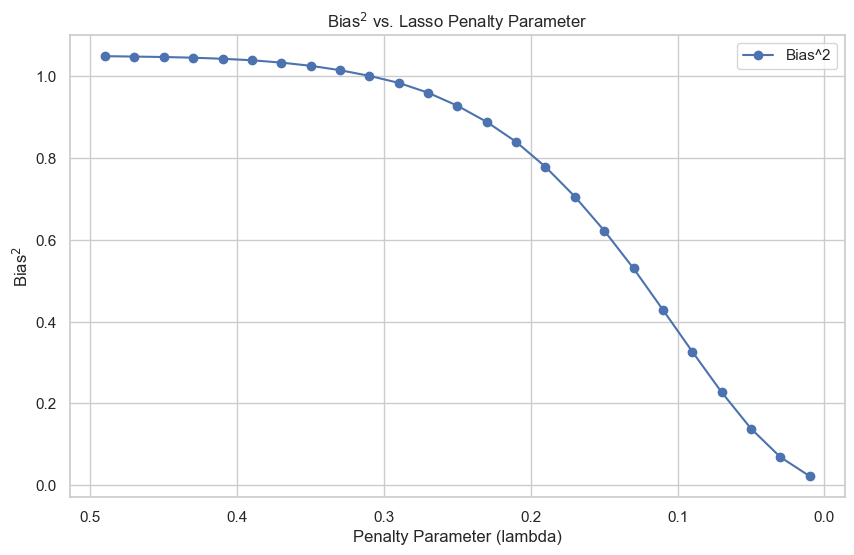

In [10]:
# Define the true function to model
def true_function(X):
    return X[:, 0] + X[:, 1]

# Simulation parameters
n_samples = 20
n_repeats = 1000
x_to_predict = np.array([[0, 0]])  # Test point to evaluate
lambdas = np.arange(0.01, 0.5, 0.02)  # Range of Lasso penalty parameters

# Initialize arrays to store results
predictions = np.empty((n_repeats, len(lambdas)))

# Monte Carlo simulation to estimate bias, variance, and MSE for each lambda
for i in range(n_repeats):
    # Generate random data
    X = np.random.uniform(0, 1, (n_samples, 2))
    epsilon = np.random.normal(0, 2, n_samples)
    Y = true_function(X) + epsilon

    # Fit Lasso model and make predictions for each lambda
    for idx, lambda_ in enumerate(lambdas):
        lasso = Lasso(alpha=lambda_).fit(X, Y)
        predictions[i, idx] = lasso.predict(x_to_predict)

# Calculate bias^2
bias_squared = (np.mean(predictions, axis=0) - true_function(x_to_predict))**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambdas, bias_squared, label='Bias^2', marker='o')
plt.xlabel('Penalty Parameter (lambda)')
plt.ylabel('Bias$^2$')
plt.title('Bias$^2$ vs. Lasso Penalty Parameter')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()


**Answer: 4. Steadily decrease**

The graph showcases squared Bias versus the Lasso Penalty Parameter (lambda), indicating a decreasing trend in squared Bias as lambda decreases (equivalently, as *s* increases from 0). It illustrates that reducing the regularization strength allows the model to better capture the underlying pattern in the data, thus decreasing the squared bias. As we move towards more flexible models (lower lambda values), the bias continues to decrease because the model's assumptions align more closely with the true data generating process.

### 2.e

(e) As we increase $s$ (constraint) from 0, the irreducible error will:
1. Increase initially, and then eventually start decreasing in an inverted U shape.
2. Decrease initially, and then eventually start increasing in a U shape.
3. Steadily increase.
4. Steadily decrease.
5. Remain constant.

**Answer: 5. Remain constant**

Irreducible error is inherent to the data and remains unaffected by changes in model complexity or adjustments in regularization strength. Therefore, as we increase *s* (constraint) from 0, altering the model's complexity or its ability to fit the data, the irreducible error will remain constant.

This constancy is due to the nature of irreducible error being independent of the modeling process, reflecting the portion of error that cannot be eliminated regardless of how sophisticated the model becomes. In other words, irreducible error refers to the intrinsic noise or randomness in the data that cannot be explained by any model, regardless of its complexity


## Part 3

### 3.a

Load the data set called PCA_data.csv. Designate the first $N_{tr}$ = 500
observations as the training sample and the last $N_{te}$  = 500 as the test sample.

In [13]:
# load the data and check the first two rows and the shape
df = pd.read_csv('https://raw.githubusercontent.com/artyomashigov/DataScience1/main/PCA_data.csv')
print(df.head(2))
print(df.shape)

          Y        X1        X2        X3        X4        X5        X6  \
0 -6.539179  0.948014  1.259177  0.763472  0.128735  0.410222  0.420989   
1  2.036508  0.019661 -1.951131 -1.097787  0.919061 -0.069719  0.405042   

         X7        X8        X9  ...       X41       X42       X43       X44  \
0 -0.101123 -1.242581  0.029933  ... -0.859282 -1.645036 -0.247500  1.372374   
1  1.808955 -0.343013  1.465924  ... -1.809128  0.381091  0.497534  0.632532   

        X45       X46       X47       X48       X49       X50  
0 -0.212618 -1.368046 -1.740719  0.925212  0.123907 -1.020763  
1 -1.429868 -2.092106  0.499216  1.026407 -0.763639 -0.405548  

[2 rows x 51 columns]
(1000, 51)


In [14]:
# designate first 500 rows as training data and the rest as test data
train = df.iloc[:500, :]
test = df.iloc[500:, :]
# check the shape of the training and test data
print(f'Training data shape: {train.shape}', f'Test data shape: {test.shape}', sep='\n')

Training data shape: (500, 51)
Test data shape: (500, 51)


### 3.b

Compute the first 10 principal component vectors and the corresponding scores
$Z^{∗}_{1}$, . . . , $Z^{∗}_{10}$ for ($X_{1}$, $X_{2}$, . . . , $X_{50}$). For simplicity, you can use the whole data set
for this (both the training sample as well as the test sample).

In [29]:
# drop the target variable from the features
X = df.drop('Y', axis=1)
y = df['Y']

# Initialize PCA with 10 components
pca = PCA(n_components=10)

# Fit PCA on features X to compute principal component scores
X_pca = pca.fit_transform(X)

# Principal component vectors are in pca.components_
pc_vectors = pca.components_

# Convert the PCA scores back into a DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])

# Convert the PCA vectors into a DataFrame for easier handling
pc_vectors_df = pd.DataFrame(pc_vectors, columns=X.columns)

# Display principal component vectors
print("Principal Component Vectors (Directions of Maximum Variance in the Original Space):")
pc_vectors_df

Principal Component Vectors (Directions of Maximum Variance in the Original Space):


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,0.027386,-0.098021,-0.269744,0.181045,0.246481,0.282822,0.198562,-0.085632,-0.140377,0.132491,...,0.065855,-0.019034,-0.079060,0.126562,0.037256,-0.220342,0.082253,0.170688,0.148154,-0.074001
1,-0.381374,-0.150504,-0.218532,-0.225911,0.246898,-0.096143,0.169222,0.284434,-0.034897,-0.159719,...,0.101877,0.000313,-0.014564,-0.028298,0.022733,0.068505,0.048708,-0.058441,-0.033582,0.061787
2,0.135433,-0.151717,0.091665,-0.265105,-0.023377,0.273498,-0.015626,-0.225438,-0.336544,-0.240344,...,-0.124977,-0.082142,0.150599,0.038964,0.069053,0.018208,0.026834,0.050555,-0.014409,0.022843
3,0.072842,0.363334,0.142808,0.047402,0.066864,0.028434,-0.136409,0.018651,-0.223775,-0.036686,...,0.073964,0.121641,0.118663,0.043417,0.192073,-0.072085,-0.043121,-0.128418,-0.061012,0.136384
4,0.007015,0.058468,0.105967,-0.179056,0.137076,0.059234,0.248135,-0.102078,0.116136,0.154075,...,-0.117555,-0.166426,0.045974,-0.265705,-0.011791,0.037965,-0.214843,-0.104651,0.077629,-0.003671
5,-0.122270,0.031839,-0.148025,0.064689,0.183536,-0.042442,0.200120,0.110913,0.032878,0.244308,...,-0.300150,0.310845,0.027031,0.042532,-0.010139,0.052068,0.151793,-0.034580,-0.088102,0.212799
6,0.008354,-0.118655,0.086377,-0.019128,-0.208907,-0.077817,0.015429,0.061855,0.042094,0.096439,...,0.027673,0.201910,-0.121992,-0.139756,0.226190,-0.205770,-0.040368,0.278123,-0.059283,0.072971
7,0.088972,0.065060,0.083860,-0.028588,0.011257,0.159985,-0.045941,-0.011128,0.056434,-0.060085,...,-0.038693,-0.052750,-0.003864,-0.251232,0.137015,0.073192,-0.240049,0.057379,0.082524,0.032148
8,-0.004383,0.127477,0.079428,-0.071204,0.046862,-0.057627,-0.074578,-0.058416,0.162701,-0.167859,...,-0.079207,-0.080962,-0.142958,0.112061,0.200629,-0.105465,0.087188,-0.066879,-0.143013,0.119676
9,0.034447,-0.043593,0.076812,-0.026107,-0.048946,-0.060115,0.200604,-0.042572,0.067735,0.043389,...,0.229804,-0.033151,-0.263852,-0.080309,0.192517,0.014778,0.073967,-0.094584,-0.112470,-0.179786


`pca_vectors_df`: It would represent the principal component vectors, which define the directions of maximum variance in the original space. The `pca.components_` array has a shape of (n_components, n_features), where n_components is the number of principal components (in this case, 10), and n_features is the number of features in the dataset (in this case, 50). Therefore, the shape of `pca_vectors_df`, created from `pca.components_`, would be (10, 50), with each row representing a principal component vector in terms of its coefficients across the 50 original features.

In [28]:
# Display the principal component scores
print("Principal Component Scores (Transformed Dataset Coordinates in PCA Space):")
X_pca_df

Principal Component Scores (Transformed Dataset Coordinates in PCA Space):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.550783,-2.970267,0.267652,0.175434,1.976616,-1.988533,-0.617782,-1.884221,1.261572,-1.054946
1,2.796538,-2.478540,-0.537040,-4.004689,1.001428,1.759740,1.316878,-2.159637,-0.370947,-0.720252
2,-4.258891,-2.647138,0.103109,0.670743,-5.054462,1.804027,0.568197,1.007597,0.346608,0.224528
3,2.640325,-2.964215,0.647299,-0.164220,-2.899971,1.725779,-0.551829,-0.362907,-1.427423,1.056406
4,0.588856,-1.423151,-1.485975,0.393068,-1.637459,0.558377,-0.636169,1.148220,-0.610525,0.755154
...,...,...,...,...,...,...,...,...,...,...
995,-5.271114,-1.862250,1.394038,1.796262,-0.151876,-1.016068,1.415720,0.176750,0.365856,1.959119
996,1.420097,1.342591,2.641065,0.310467,-2.922987,1.383079,-2.404973,0.253194,-1.229151,-1.441099
997,-0.838230,4.706777,1.038365,1.926539,-1.573077,-0.503841,3.292344,-0.970198,-2.115660,-0.756059
998,0.858898,-0.015783,0.885161,0.190732,0.434894,-1.547179,0.763504,-3.624714,2.582674,1.077131


`X_pca_df`: This contains the principal component scores for each observation. Since we're transforming the original dataset of 1,000 observations into a space defined by the first 10 principal components, `X_pca_df` will have 1,000 rows (one for each observation) and 10 columns (one for each principal component score). Thus, the shape of `X_pca_df` would be (1000, 10).

### 3.c

Estimate an OLS regression of Y on a constant and $X_{1}$, . . . , $X_{50}$ over the training
sample. Estimate OLS regressions of Y on a constant and $Z^{∗}_{1}$, . . . , $Z^{∗}_{k}$
over the
training sample for k = 1, 5, 10.

In [42]:
# Separate features and target for training and test datasets
X_train = train.drop(columns=['Y'])
y_train = train['Y']
X_test = test.drop(columns=['Y'])
y_test = test['Y']

# OLS regression of Y on X1, ..., X50
model_OLS = LinearRegression().fit(X_train, y_train)

# Compute the first 10 principal component scores for the training data
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

### 3.d

Use the four models estimated under part c) the obtain predictions for the outcomes $Y_{i}$
in the test sample. Compute the mean squared prediction error for
the four different predictions and report these numbers. You should get results
similar to those on slide 22, but there will be some differences because the whole
experiment is performed only once. (The slide averages over many experiments.)

In [48]:
# Predict and compute MSE for OLS model
y_pred_OLS = model_OLS.predict(X_test)
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
print(f'MSE for OLS model: {mse_OLS}')

# Predict and evaluate OLS models for k=1, 5, 10 principal components
mse_results = {'Model': ['OLS', 'PCA 1', 'PCA 5', 'PCA 10'], 'MSE': [mse_OLS]}
for k in [1, 5, 10]:
    model_pca = LinearRegression().fit(X_train_pca[:, :k], y_train)
    y_pred_pca = model_pca.predict(X_test_pca[:, :k])
    mse_pca = mean_squared_error(y_test, y_pred_pca)
    mse_results['MSE'].append(mse_pca)
    print(f'MSE for PCA model with {k} components: {mse_pca}')

# Create a DataFrame from the dictionary
mse_results_df = pd.DataFrame(mse_results).round(3)
mse_results_df

MSE for OLS model: 4.3340766054873745
MSE for PCA model with 1 components: 15.017898075045812
MSE for PCA model with 5 components: 12.470382816407561
MSE for PCA model with 10 components: 9.035481209805667


,Model,MSE
0,OLS,4.334
1,PCA 1,15.018
2,PCA 5,12.470
3,PCA 10,9.035


### 3.e

Consider again the original ’Dense DGP’ table on slide 22, Lecture 3. Discuss
and explain the MSPE patterns you see in the first column ($N_{tr}$ = 75) and the
last column ($N_{tr}$ = 500).

**Table MSPE**
| DENSE DGP | $N_{tr}$=75 | $N_{tr}$=150 | $N_{tr}$=500 |
|---|---|---|---|
| OLS | 12.9 | 6.0 | 4.5 |
| PCA (k=1) | 14.9 | 14.7 | 14.6 |
| PCA (k=5) | 13.6 | 13.0 | 12.7 |
| PCA (k=10) | 9.3 | 8.5 | 8.0 |


**Answer**

The table shows the Mean Squared Prediction Error (MSPE) for different regression models (OLS and PCA with varying numbers of components  k=1,5,10) applied to datasets of varying training sizes ($N_{tr}$=75,150,500)

1. For $N_{tr} = 75$ (small training sample):
    - The MSPE values are higher across all models, which is expected due to the limited amount of training data available. This limited data can restrict the model's ability to learn the underlying patterns effectively.
    - The best model is PCA (k = 10). This suggests that even with a limited dataset, using a moderated number of principal components can enhance prediction accuracy by balancing model complexity and the risk of overfitting.
    - The OLS model ranks as the second-best performer. This could be due to the dense nature of the DGP, where all predictors have non-zero coefficients, making it challenging to identify the most impactful features without introducing some level of overfitting.
    - PCA = 1 and PCA = 5 proves the concept of DENSE DGP, indicating that a too simplistic model fails to capture enough variance of the data, leading to high bias.
2. For $N_{tr} = 500$ (large training sample):
    - The MSPE values decrease for all models, illustrating that having more data improves model training and predictive accuracy due to reduced variance and better generalization capability.
    - The OLS model shows significant improvement as the training size increases, achieving the lowest MSPE at $N_{tr} = 500$. This indicates that with sufficient data, the OLS model can effectively capture the underlying data structure.
    - While PCA models still benefit from the larger dataset, the improvement in MSPE as as the number of components increases suggests that incorporating more components (hence, more information from the original features) generally leads to better performance in large datasets. However, the OLS model outperforms PCA models, possibly because the data's complexity can be fully captured with all features when the sample size is large enough to mitigate overfitting risks.

Overall, the MSPE pattern from small to large training sizes highlights the trade-off between bias and variance and demonstrates the importance of model complexity relative to sample size. With small datasets, simpler models or models with dimensionality reduction (like PCA with an optimal number of components) can perform better by avoiding overfitting. As the dataset size increases, the full complexity of the data can be more safely leveraged to improve predictions, as seen with the full OLS model's performance at $N_{tr} = 500$.

PCA models do not demonstrate the same improvement as OLS models with increased data size. This is likely due to the inherent trade-off between dimensionality reduction and the preservation of informative variance. In a 'dense' Data Generating Process (DGP), where all predictors potentially contribute to the outcome, PCA's information loss becomes more significant.  With more data, the OLS model can effectively leverage the additional information without the same overfitting concerns that PCA aims to address in smaller datasets. While PCA helps reduce overfitting by simplifying the feature space, it also introduces bias by discarding some variance in the data. This bias can limit prediction accuracy as the dataset size increases. Therefore, the OLS model,  using its full complexity with a larger dataset, can better adapt to the underlying data structure, outperforming the efficiency of PCA models.